In [1]:
from basicsr.trainer import Surgeon, SurgeonTrainer
from basicsr.data import restore_volume,\
     semi_synthetic_creation, generate_raw_data, generate_zs_dataset
from basicsr.model_train import trainer_train, restore
from easydict import EasyDict
import os

In [2]:
raw_tif_pth, kernel_num, project_depth, data_pth = \
    './raw_data.tif', 3, 5, './demo_dataset'

semi_synthetic_creation(raw_tif_pth = raw_tif_pth, save_pth = data_pth, \
    kernel_num = kernel_num, project_depth = project_depth, downsample_rate = 5,  rotation = False)

generate_raw_data(raw_pth = raw_tif_pth, save_pth= data_pth, dr = 5)

In [2]:
generate_zs_dataset('./demo_dataset')

In [ ]:
data_pth = './demo_dataset'
configs = EasyDict({
    'model_path' : f'./experiments/pretrained_models/NAFNet-REDS-width64.pth',
    'lq_pth': './demo_dataset/zs_lq',
    'gt_pth': './demo_dataset/zs_gt',
    'lr': 1e-4
})
operation = Surgeon(configs)
operation.get_zeroshot_information()
surgeon_trainer = SurgeonTrainer()
elementwise_input = operation.input_dict.copy()
rank = surgeon_trainer.forward_all(elementwise_input)

In [ ]:
trainer_train(rank, data_pth)

In [3]:
data_pth = './demo_dataset'
in_pth_xz = os.path.join(data_pth, 'test_xz')
in_pth_yz = os.path.join(data_pth, 'test_yz')
out_root = './experiments'
out_pth_xz = os.path.join(out_root, 'test_xz')
out_pth_yz = os.path.join(out_root, 'test_yz')
restore(input_pth = in_pth_xz,\
        output_pth = out_pth_xz,\
        model_pth =  './experiments/sanity_check/models/net_g_latest.pth')

restore(input_pth = in_pth_yz,\
        output_pth = out_pth_yz,\
        model_pth =  './experiments/sanity_check/models/net_g_latest.pth')

Disable distributed.
none


2024-09-16 19:42:29,234 INFO: Loading NAFNetLocal model from ./experiments/sanity_check/models/net_g_latest.pth.


FileNotFoundError: [Errno 2] No such file or directory: './experiments/sanity_check/models/net_g_latest.pth'

In [ ]:
raw_tif_pth = '/home/youlab/Desktop/workspace/jiashu/tb_logger/test_SSAI3D/demo/train_data/test_xz'
out_pth_xz = '/home/youlab/Desktop/workspace/jiashu/SSAI3D/review/sanity/neurons/test_other'
out_pth_yz = '/home/youlab/Desktop/workspace/jiashu/SSAI3D/review/sanity/neurons/test'
raw, xz, yz, av = restore_volume(raw_tif_pth, out_pth_xz, out_pth_yz)

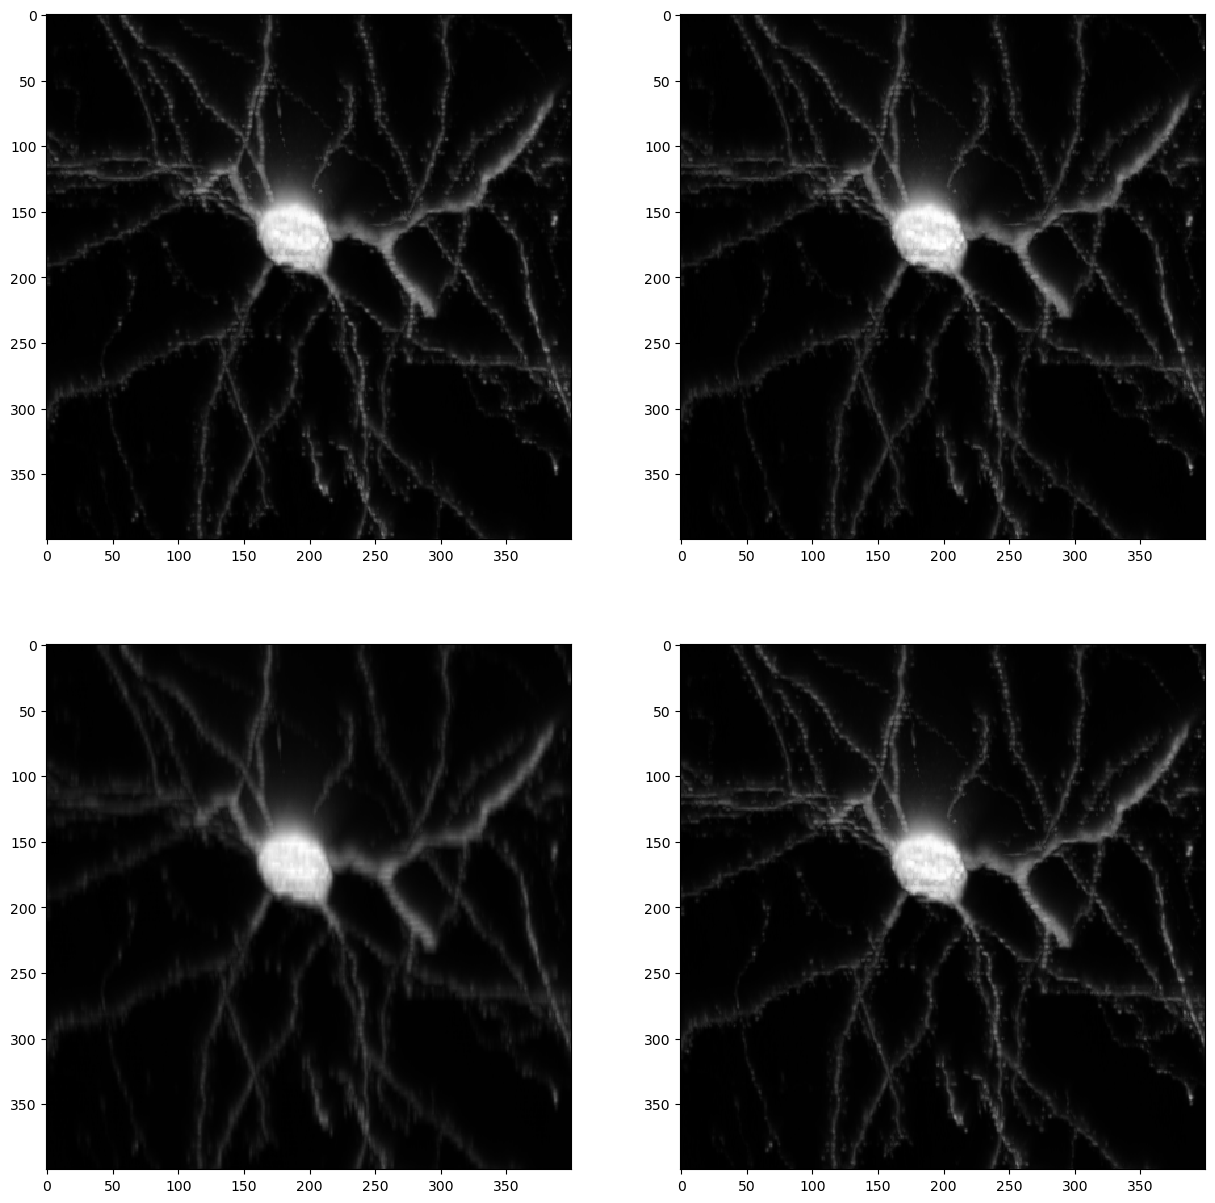

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
slice = 200
depth = 200
figs, axs = plt.subplots(2,2,figsize=(15,15))
tmp = np.swapaxes(yz,0,2 )
axs[0,0].imshow(np.amax(xz[slice : slice + depth],0)[:400, :400], cmap = 'gray')
axs[0,1].imshow(np.amax(tmp[slice : slice + depth],0)[:400, :400], cmap = 'gray')
axs[1,0].imshow(np.amax(raw[slice : slice + depth],0)[:400, :400], cmap = 'gray')
axs[1,1].imshow(np.amax(av[slice : slice + depth],0)[:400, :400], cmap = 'gray')